In [2]:
from get_sample import get_sample
from get_tfidf_df import get_tfidf_df
from get_category_df import get_category_df
from get_merged_df import merge_df
from plot_learning_curve import plot_learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import pandas as pd

In [3]:
X_train, X_test, y_train, y_test = get_sample(cutoff=10000, test_size=0.33)

In [4]:
train_tfidf_df, test_tfidf_df = get_tfidf_df(X_train, X_test)

100%|██████████| 3300/3300 [00:19<00:00, 171.26it/s]


In [5]:
train_category_df, test_category_df = get_category_df(X_train, X_test)

c:\Users\Tyler\Documents\ERAU\cs455_project\get_category_df.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['category_name'] = train_set[['category_name']].apply(le.fit_transform)
c:\Users\Tyler\Documents\ERAU\cs455_project\get_category_df.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['brand_name'] = train_set[['brand_name']].apply(le.fit_transform)
c:\Users\Tyler\Documents\ERAU\cs455_project\get_category_df.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [6]:
# Merge dfs together
x_train_merged = merge_df(train_tfidf_df, train_category_df)
x_test_merged = merge_df(test_tfidf_df, test_category_df)

In [7]:

# Train
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_merged, y_train)

KNeighborsRegressor(n_neighbors=10)

In [8]:

# Predict
predictions = knn.predict(x_test_merged)

In [9]:
prediction_comparisons = pd.DataFrame({"item name": X_test['name'], 'desc': X_test['item_description'], "actual price": y_test, "predicted price": predictions})

In [10]:
prediction_comparisons

,item name,desc,actual price,predicted price
6252,N64 super mario 64 (label stain),Great item great price shipped securely Free s...,21.0,15.2
4684,Jordan 9c Retro Gamma 11s,Size 9c Gamma gamma retro 11s. Used but no abs...,29.0,32.8
1731,5 Pair of Lashes + Lash Tweezers,Perfect for the False Eyelash Beginner! ⭐️This...,7.0,10.7
4742,Bundle for LizKay,GB Girls size 10. Fits like size 8. Great used...,40.0,29.5
4521,New Balance Minimus size 8 - women,Good used condition. Very comfy shoe ladies sh...,16.0,36.0
...,...,...,...,...
1744,NWT VS PINK FLAT LEGGING BLING,Brand new with tags VS PINK FLAT LEGGING WITH ...,54.0,23.8
9754,Adidas Ortholite Girls 7c,Adidas Ortholite Girls 7 toddler.,16.0,19.0
6094,NWT Victoria's Secret plunge bra,NWT Victoria's Secret lightly lined plunge bra...,25.0,28.6
8781,Lularoe 2xl Carly blue,Bnwt Make sure you check out my other listings...,40.0,60.6


In [12]:
r2_score(y_test, predictions)

-0.020899841387575613

100%|██████████| 94/94 [02:24<00:00,  1.54s/it]


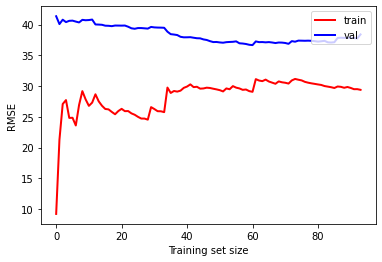

In [13]:
plot_learning_curve(knn, x_train_merged, y_train, step=50)